## Zadanie 6

# Prawa arcusa sinusa

Ciągła zmienna losowa $X$ ma rozkład arcusa sinusa ($X$~Arcsine), gdy jej funkcja gęstości prawdopodobieństwa ma postać:
$$p_X(x) = \dfrac{1}{\pi \sqrt{x(1-x)}}$$

Dystrybuanta tej zmiennej jest równa:
$$f(x)=\begin{cases}
0, & \text{gdy } x<0, \\
\dfrac{2}{\pi}\text{arcsin}(\sqrt{x}), & \text{gdy } x \in [0, 1],\\
1, & \text{gdy } x>1.
\end{cases}$$

Prawa arcusa sinusa - jest to zbiór trzech praw, spełnionych przez proces Wienera $W_t$. Brzmią one następująco:

### Pierwsze prawo arcusa sinusa

$$T_+ = \lambda ({t \in [0, 1]|W_t > 0}) \text{ \~ Arcsine}$$

gdzie $\lambda$ to miara Lebesgue'a. Treść tego prawa jest następująca: czas spędzony przez proces Wienera powyżej osi OX na odcinku [0, 1] ma rozkład arcusa sinusa.

### Drugie prawo arcusa sinusa

$$L=\sup \left( t \in [0, 1]|W_t = 0 \right) \text{ \~ Arcsine} $$

Oznacza to, że ostatni moment uderzenia procesu Wienera na odcinku [0, 1] w oś OX ma rozkład arcusa sinusa.

### Trzecie prawo arcusa sinusa

Niech M będzie liczbą spełniającą:
$$ W_M = \sup (W_t | t \in [0, 1]) $$

Wtedy $M$ ~ Arcsine. Inaczej, moment osiągnięcia maksymalnej wartości przez proces Wienera na odcinku [0, 1] ma rozkład arcusa sinusa.

W pierwszej kolejności, importujemy potrzebne biblioteki:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Będzie również potrzebna funkcja, symulująca proces Wienera. Mamy 10000 kroków czasowych na przedziale [0, 1], dla pierwszego z nich wartość jest równa 0. Kolejne wartości symulujemy, biorąc wartość poprzedzającą i dodając do niej krok czasowy pomnożony przez próbkę z rozkładu normalnego.

In [3]:
def simulate_Wiener_process() -> list:
    """Symuluj proces Wienera.

    Returns
    -------
        W: list
            Lista wysymulowanych wartości f(x) dla x będącego wielokrotnością 1/10000 na odcinku [0, 1].
    """
    step = 1 / 10000
    W = [0 for i in range(10001)]
    for i in range(1, len(W)):
        W[i] += W[i - 1] + step * np.random.normal()
    return W

Aby sprawdzić poprawność pierwszego prawa arcusa sinusa, symulujemy proces Wienera $n$ razy. Za każdym razem otrzymujemy listę wyników odpowiadającą wartościom przyjmowanym przez proces Wienera w każdym kroku czasowym. Zliczamy ilość kroków czasowych, kiedy proces Wienera przyjmuje wartość większą od 0, i dzielimy przez długość listy wyników. Otrzymujemy listę $n$ wyników.

In [4]:
def check_first_arcsin_law(n: int) -> list:
    """Wysymuluj n razy proces Wienera, za każdym razem przelicz stosunek ilości wyników powyżej 0 do ilości wszystkich wyników oraz dodaj go do listy wyników.

    Parameters
    ----------
        n: int
            Ilość powtórzeń symulacji procesu Wienera.

    Returns
    -------
        results_first_arcsin_law: list
            Lista składająca się z otrzymanych dla każdej symulacji wyników.
    """
    results_first_arcsin_law = [0 for i in range(n)]
    for i in range(n):
        W = simulate_Wiener_process()
        results_above_OX = [i for i in W if i > 0]
        time_spent_above_OX = len(results_above_OX) / len(W)
        results_first_arcsin_law[i] += time_spent_above_OX
    return results_first_arcsin_law


first_arcsin_law = check_first_arcsin_law(1000)

Do porównania zgodności dystrybuant oraz gęstości potrzebne będą dystrybuanta teoretyczna oraz gęstość teoretyczna. Aby przedstawić je na wykresie, wybieramy wektor x o wartościach odpowiadającym wartościom na osi OX procesu Wienera i dla każdego elementu w x obliczamy wartość dystrybuanty i gęstości:

In [5]:
x = np.linspace(0, 1, 10000)
F = (2 / np.pi) * np.arcsin(np.sqrt(x))
f = 1 / (np.pi * (np.sqrt(x * (1 - x))))

C:\Users\Magdalena\AppData\Local\Temp\ipykernel_20528\2813388792.py:3: RuntimeWarning: divide by zero encountered in divide
  f = 1/(np.pi*(np.sqrt(x*(1-x))))


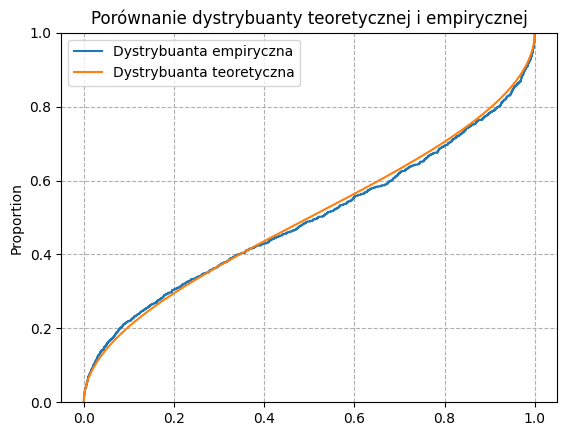

In [28]:
plt.Figure(figsize=(4, 3))
sns.ecdfplot(first_arcsin_law)
plt.plot(x, F)
plt.title("Porównanie dystrybuanty teoretycznej i empirycznej")
plt.legend(["Dystrybuanta empiryczna", "Dystrybuanta teoretyczna"])
plt.grid(linestyle="--")
plt.show()

Powyższy wykres ukazuje porównanie dystrybuanty empirycznej - wyznaczonej z symulacji, z dystrybuantą teoretyczną. Można zauważyć, że wartości otrzymane w obu przypadkach są bardzo podobne, co potwierdza prawdziwość pierwszego prawa arcusa sinusa.

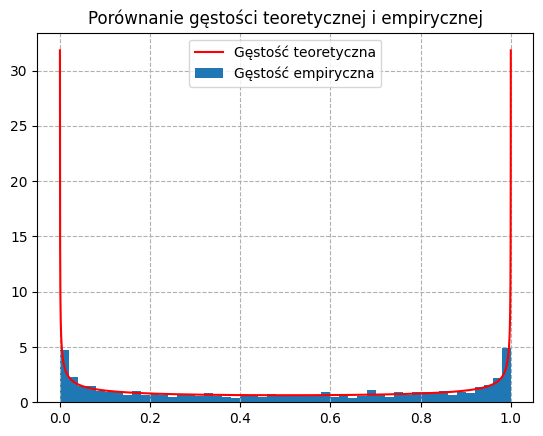

In [27]:
plt.Figure(figsize=(4, 3))
plt.hist(first_arcsin_law, density=True, bins=50)
plt.plot(x, f, color="red")
plt.title("Porównanie gęstości teoretycznej i empirycznej")
plt.legend(["Gęstość teoretyczna", "Gęstość empiryczna"])
plt.grid(linestyle="--")
plt.show()

Również porównanie histogramu dla otrzymanych symulacyjnie wyników z gętością teoretyczną potwierdza prawdziwość pierwszego prawa arcusa sinusa.

Aby sprawdzić poprawność drugiego prawa arcusa sinusa, ponownie symulujemy proces Wienera $n$ razy. Za każdym razem porównujemy wszystkie sąsiadujące ze sobą wartości, żeby znaleźć momenty, w których znak wyniku zmienia się z plusa na minus. Moment odpowiadający ostatniej zmianie znaku jest dodawany do listy wyników. Otrzymujemy listę $n$ wyników.

In [8]:
def check_second_arcsin_law(n: int) -> list:
    """Wysymuluj n razy proces Wienera, za każdym razem przejdź po całej liście wyników w poszukiwaniu momentu, w którym znak zmienia się z plusa na minus, i dodaj do listy wyników moment ostatniej zmiany znaku.

    Parameters
    ----------
        n: int
            Ilość powtórzeń symulacji procesu Wienera.

    Returns
    -------
        results_first_arcsin_law: list
            Lista składająca się z otrzymanych dla każdej symulacji wyników.
    """
    results_second_arcsin_law = [0 for i in range(n)]
    for i in range(n):
        W = simulate_Wiener_process()
        moments_of_OX = []
        for j in range(len(W) - 1):
            if W[j] > 0 and W[j + 1] < 0:
                moments_of_OX.append(j / 10000)
        if len(moments_of_OX) > 0:
            results_second_arcsin_law[i] += moments_of_OX[-1]
        else:
            results_second_arcsin_law[i] += 0
    return results_second_arcsin_law


second_arcsin_law = check_second_arcsin_law(1000)

Podobnie jak w przypadku pierwszego prawa arcusa sinusa, porównujemy dystrybuantę oraz gęstość empiryczną - wyznaczone na podstawie symulacji, z teoretycznymi wykresami:

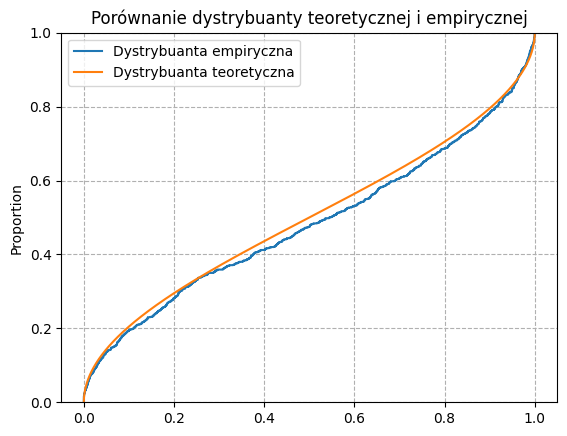

In [26]:
plt.Figure(figsize=(4, 3))
sns.ecdfplot(second_arcsin_law)
plt.plot(x, F)
plt.title("Porównanie dystrybuanty teoretycznej i empirycznej")
plt.legend(["Dystrybuanta empiryczna", "Dystrybuanta teoretyczna"])
plt.grid(linestyle="--")
plt.show()

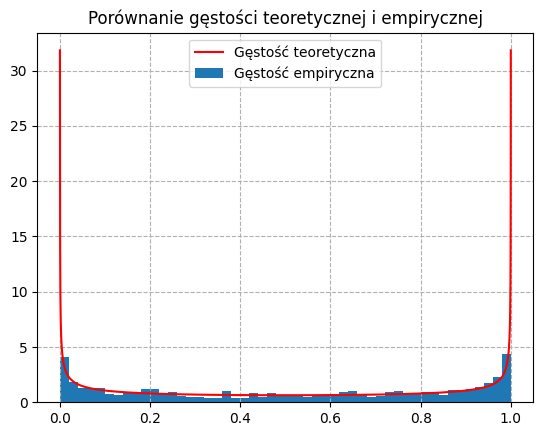

In [25]:
plt.Figure(figsize=(4, 3))
plt.hist(second_arcsin_law, density=True, bins=50)
plt.plot(x, f, color="red")
plt.title("Porównanie gęstości teoretycznej i empirycznej")
plt.legend(["Gęstość teoretyczna", "Gęstość empiryczna"])
plt.grid(linestyle="--")
plt.show()

Również w tym przypadku wyniki otrzymane symulacyjnie znajdują się blisko wartości teoretycznych - potwierdza to prawdziwość drugiego prawa arcusa sinusa.

W przypadku ostatniego, trzeciego prawa arcusa sinusa, ponownie symulujemy proces Wienera $n$ razy, następnie dla każdej symulacji znajdujemy maksymalną wartość przyjętą przez proces, i ustalamy, w którym momencie proces Wienera osiągnął tę wartość. Wynik dodajemy do listy wyników. Otrzymujemy listę $n$ wyników.

In [11]:
def check_third_arcsin_law(n: int) -> list:
    """Wysymuluj n razy proces Wienera, za każdym razem znajdź najwyższą wartość przyjętą przez proces, znajdź odpowiadający jej czas i dodaj go do listy wyników.

    Parameters
    ----------
        n: int
            Ilość powtórzeń symulacji procesu Wienera.

    Returns
    -------
        results_first_arcsin_law: list
            Lista składająca się z otrzymanych dla każdej symulacji wyników.
    """
    results_third_arcsin_law = [0 for i in range(n)]
    for i in range(n):
        W = simulate_Wiener_process()
        max_value = np.max(W)
        index = W.index(max_value)
        results_third_arcsin_law[i] += index / 10000
    return results_third_arcsin_law


third_arcsin_law = check_third_arcsin_law(1000)

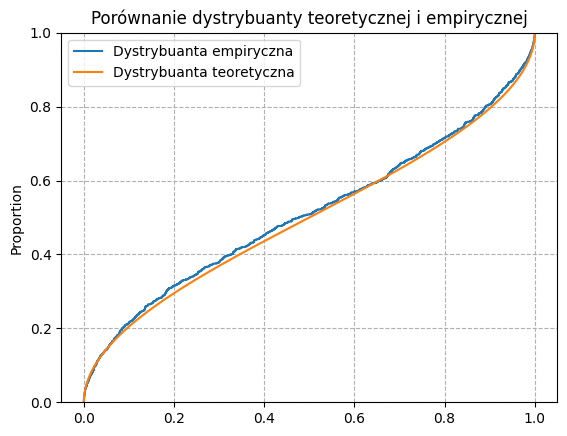

In [24]:
plt.Figure(figsize=(4, 3))
sns.ecdfplot(third_arcsin_law)
plt.plot(x, F)
plt.title("Porównanie dystrybuanty teoretycznej i empirycznej")
plt.legend(["Dystrybuanta empiryczna", "Dystrybuanta teoretyczna"])
plt.grid(linestyle="--")
plt.show()

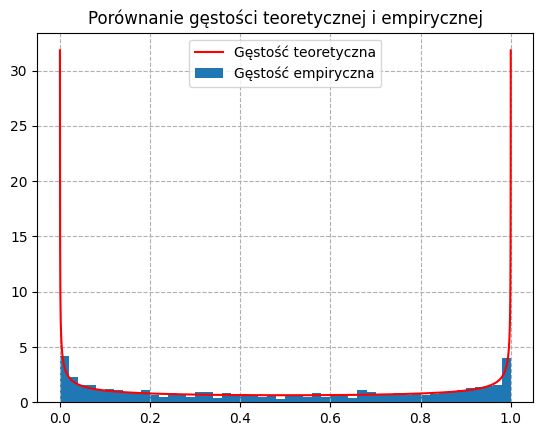

In [23]:
plt.Figure(figsize=(4, 3))
plt.hist(third_arcsin_law, density=True, bins=50)
plt.plot(x, f, color="red")
plt.title("Porównanie gęstości teoretycznej i empirycznej")
plt.legend(["Gęstość teoretyczna", "Gęstość empiryczna"])
plt.grid(linestyle="--")
plt.show()

Również za trzecim razem wartości wyznaczone symulacyjnie są zbliżone do tych teoretycznych. Oznacza to, że także trzecie prawo arcusa sinusa jest prawdziwe.